Action1	"基于评分卡的风控模型开发
数据集GiveMeSomeCredit，15万样本数据
https://www.kaggle.com/c/GiveMeSomeCredit/data
使用WOE进行特征变换，IV进行特征筛选，LR构建风控模型，并对模型评分规则进行可解释性说明 
–基本属性：包括了借款人当时的年龄
– 偿债能力：包括了借款人的月收入、负债比率
– 信用往来：两年内35-59天逾期次数、两年内60-89天逾期次数、两年内90天或高于90天逾期的次数
– 财产状况：包括了开放式信贷和贷款数量、不动产贷款或额度数量。
– 其他因素：包括了借款人的家属数量"			

1、完成LR模型（30points）
2、对评分卡模型的规则进行说明（30points）

评分卡模型开发步骤：
Step1，数据获取，包括获取存量客户及潜在客户的数据
存量客户，已开展融资业务的客户，包括个人客户和机构客户；
潜在客户，将要开展业务的客户
Step2，EDA，获取样本整体情况，进行直方图、箱形图可视化
Step3，数据预处理，包括数据清洗、缺失值处理、异常值处理
Step4，变量筛选，通过统计学的方法，筛选出对违约状态影响最显著的指标。主要有单变量特征选择和基于机器学习的方法
Step5，模型开发，包括变量分段、变量的WOE（证据权重）变换和逻辑回归估算三个部分
Step6，模型评估，评估模型的区分能力、预测能力、稳定性，并形成模型评估报告，得出模型是否可以使用的结论
Step7，生成评分卡（信用评分），根据逻辑回归的系数和WOE等确定信用评分的方法，将Logistic模型转换为标准评分的形式
Step8，建立评分系统（布置上线），根据生成的评分卡，建立自动信用评分系统

字段                         	          说明	                                                                   类型
SeriousDlqin2yrs	                    90天以上逾期或更差	                                                        Y/N
Age	                                    年龄	                                                                     整数
RevolvingUtilizationOfUnsecuredLines	除房地产和汽车贷款等无分期付款债务外，信用卡和个人信用额度的总余额除以信贷限额	   百分比
DebtRatio	                            债务比（每月偿还的债务，赡养费，生活费除以每月的总收入）	                    百分比
MonthlyIncome	                        每月收入	                                                                实数
NumberOfOpenCreditLinesAndLoans	        公开贷款(如汽车贷款或抵押贷款)和信用额度(如信用卡)的数量	                      整数
NumberRealEstateLoansOrLines	        抵押贷款和房地产贷款的额度（包括房屋净值信贷）	                                整数
NumberOfTime30-59DaysPastDueNotWorse	借款人逾期30-59天的次数，但在过去两年没有更糟	                               整数
NumberOfTime60-89DaysPastDueNotWorse	借款人逾期60-89天的次数，但在过去两年没有更糟	                               整数
NumberOfTimes90DaysLate                 借款人逾期90天（或以上）的次数	                                             整数
NumberOfDependents	                    除自己(配偶、子女等)以外的家庭受养人人数	                                     整数

Step1，数据探索性分析
违约率分析
缺失值分析
对于某个字段的统计分析（比如RevolvingUtilizationOfUnsecuredLines）

In [1]:
import pandas as pd
#数据加载
df_train = pd.read_csv('./score_card/cs-training.csv')
df_train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [2]:
#去掉第一列
df_train = df_train.iloc[:,1:]
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
df_train['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

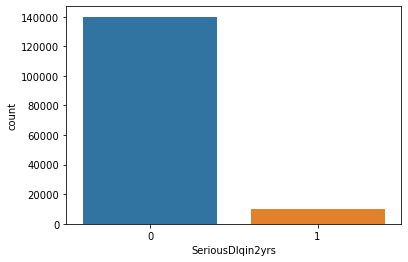

In [4]:
#违约率SeriousDlqin2yrs进行可视化
import seaborn as sn
sn.countplot(x='SeriousDlqin2yrs',data=df_train)

In [5]:
#违约比例
df_train['SeriousDlqin2yrs'].sum()/len(df_train)

0.06684

In [6]:
df_train.isnull().sum()
#MonthlyIncome                           
#NumberOfDependents                       

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [7]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [8]:
df_train[df_train['RevolvingUtilizationOfUnsecuredLines']>1]['RevolvingUtilizationOfUnsecuredLines'].mean()

259.77336166149837

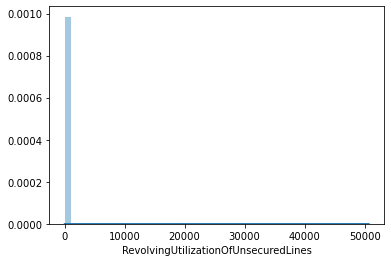

In [9]:
#直方图分布
sn.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])

In [10]:
df_train.mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [11]:
df_train.median()#中位数

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

Step2，数据缺失值填充，采用简单规则，如使用中位数进行填充

In [12]:
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## Step3，变量分箱
1）对于age字段，分成6段 [-math.inf, 25, 40, 50, 60, 70, math.inf]

2）对于NumberOfDependents（家属人数）字段，分成6段
 [-math.inf,2,4,6,8,10,math.inf]

3）对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段
[-math.inf,1,2,3,4,5,6,7,8,9,math.inf]

4）对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段

In [13]:
import math
#将age进行分箱
bin_age = [-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train['bin_age'] = pd.cut(df_train['age'],bins = bin_age)
df_train[['age','bin_age']]

,age,bin_age
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


In [14]:
#对NumberOfDependents(家属人数)分箱
dependents_bins = [-math.inf,2,4,6,8,10,math.inf]
df_train['bin_NumberOfDependents'] =  pd.cut(df_train['NumberOfDependents'],bins = dependents_bins)
df_train[['NumberOfDependents','bin_NumberOfDependents']]

,NumberOfDependents,bin_NumberOfDependents
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


In [15]:
#对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段
dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'] =  pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'],bins = dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'] =  pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'],bins = dpd_bins)
df_train['bin_NumberOfTimes90DaysLate'] =  pd.cut(df_train['NumberOfTimes90DaysLate'],bins = dpd_bins)

In [16]:
#查看分箱情况
df_train[['NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','bin_NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate','bin_NumberOfTimes90DaysLate']]

,NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,bin_NumberOfTimes90DaysLate
0,2,"(1.0, 2.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
1,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
2,1,"(-inf, 1.0]",0,"(-inf, 1.0]",1,"(-inf, 1.0]"
3,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
4,1,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
...,...,...,...,...,...,...
149995,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149996,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149997,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"
149998,0,"(-inf, 1.0]",0,"(-inf, 1.0]",0,"(-inf, 1.0]"


In [17]:
#对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段
#数据集太大,需要drop掉重复的
df_train['bin_RevolvingUtilizationOfUnsecuredLines']= pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop')
df_train['bin_DebtRatio']= pd.qcut(df_train['DebtRatio'],q=5,duplicates='drop')
df_train['bin_MonthlyIncome']= pd.qcut(df_train['MonthlyIncome'],q=5,duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans']= pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop')
#df_train['bin_NumberRealEstateLoansOrLines']= pd.qcut(df_train['NumberRealEstateLoansOrLines'],q=5,duplicates='drop')


In [18]:
loans_bins = [-math.inf,0,1,2,3,math.inf]
df_train['bin_NumberRealEstateLoansOrLines']= pd.cut(df_train['NumberRealEstateLoansOrLines'],bins=loans_bins)
df_train['bin_NumberRealEstateLoansOrLines'].value_counts()

(-inf, 0.0]    56188
(0.0, 1.0]     52338
(1.0, 2.0]     31522
(2.0, 3.0]      6300
(3.0, inf]      3652
Name: bin_NumberRealEstateLoansOrLines, dtype: int64

In [19]:
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(0.0, 1.0]"
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(0.0, 1.0]"
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(0.0, 1.0]"
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-inf, 0.0]"


In [20]:
#统计分箱字段
bin_cols = [c for c in df_train.columns.values \
            if c.startswith('bin_')
           ]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

Step4，特征筛选
使用IV值衡量自变量的预测能力，筛选IV值>0.1的特征字段

In [21]:
import numpy as np
def cal_IV(df,feature,target):
    lst=[]
    cols = ['Variable','Value','All','Bad']
    #对feature字段中的每个分箱取值进行遍历
    for i in range(df[feature].nunique()):#unique代表不同的阈值,nunique =number of unique不同值的个数
        #第i个分箱取值val
        val = list(df[feature].unique())[i]
        #统计feature,feature_value,这个value的个数,这个value导致target=1的个数
        lst.append([feature,val,len(df[df[feature]==val]),\
                                   len(df[(df[feature]==val) & (df[target]==1)])])
    #print(lst)
    data = pd.DataFrame(lst,columns=cols)
    data = data[data['Bad']>0]
    
    data['Share'] = data['All']/data['All'].sum()#这个Value所占比例
    data['Bad_Rate'] = data['Bad']/data['All']#这个value导致bad的情况.在该value个数的比例
    data['Margin Bad'] = data['Bad']/data['Bad'].sum()#Margin Bad
    data['Margin Good'] = (data['All']-data['Bad'])/(data['All'].sum()-data['Bad'].sum())#Margin Bad
    data['woe']=np.log(data['Margin Bad']/data['Margin Good'])
    data['iv'] = (data['woe']*(data['Margin Bad'] - data['Margin Good'])).sum()
    data = data.sort_values(by=['Variable','Value'])
    return data['iv'].values[0]
    #print(data)
cal_IV(df_train,'bin_age','SeriousDlqin2yrs')
        
        

0.24041120302785982

In [22]:
df = df_train
feature = 'bin_age'
val = list(df[feature].unique())[0]
#df[df[feature]==val].count()
len(df[df[feature]==val])

35037

In [23]:
#计算每个字段的IV值

for  f in bin_cols:
    print(f,cal_IV(df_train,f,'SeriousDlqin2yrs'))
    

bin_age 0.24041120302785982
bin_NumberOfDependents 0.01450836007644442
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.05623446147714756
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505
bin_NumberRealEstateLoansOrLines 0.06167337290177645


# 只选择IV>0.1的,入选的字段有以下
* bin_NumberOfTime30-59DaysPastDueNotWorse 
* bin_NumberOfTime60-89DaysPastDueNotWorse 
* bin_NumberOfTimes90DaysLate 
* bin_RevolvingUtilizationOfUnsecuredLines
* bin_age

In [24]:
df_train[['RevolvingUtilizationOfUnsecuredLines','bin_RevolvingUtilizationOfUnsecuredLines']]

,RevolvingUtilizationOfUnsecuredLines,bin_RevolvingUtilizationOfUnsecuredLines
0,0.766127,"(0.699, 50708.0]"
1,0.957151,"(0.699, 50708.0]"
2,0.658180,"(0.271, 0.699]"
3,0.233810,"(0.0832, 0.271]"
4,0.907239,"(0.699, 50708.0]"
...,...,...
149995,0.040674,"(0.0192, 0.0832]"
149996,0.299745,"(0.271, 0.699]"
149997,0.246044,"(0.0832, 0.271]"
149998,0.000000,"(-0.001, 0.0192]"


In [25]:
feature_cols = ['bin_NumberOfTime30-59DaysPastDueNotWorse',\
'bin_NumberOfTime60-89DaysPastDueNotWorse',\
'bin_NumberOfTimes90DaysLate',\
'bin_RevolvingUtilizationOfUnsecuredLines',\
'bin_age']
df[feature_cols]

,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_age
0,"(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(40.0, 50.0]"
1,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(25.0, 40.0]"
2,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(25.0, 40.0]"
3,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(25.0, 40.0]"
4,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(40.0, 50.0]"
...,...,...,...,...,...
149995,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(70.0, inf]"
149996,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(40.0, 50.0]"
149997,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(50.0, 60.0]"
149998,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(25.0, 40.0]"


# Step5，对于筛选出来的特征，计算每个bin的WOE值


In [26]:
def cal_WOE(df,feature,target):
    df_new = df.copy()
    for f in feature:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns=list(map(''.join,df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns={target+'sum':'bad',target+'count':'all'})
        #print(df_woe)
        #print(df_woe.columns)
        df_woe['good'] = df_woe['all']-df_woe['bad']
        df_woe['margin bad'] = df_woe['bad']/df_woe['bad'].sum()
        df_woe['margin good'] = df_woe['good']/df_woe['good'].sum()
        #'margin good避免分母为0的情况,使用np.log1p
        df_woe['woe'] = np.log1p(df_woe['margin bad'] /df_woe['margin good'])
        #print(df_woe)
        df_woe.columns = [c if c ==f else c+'_' +f for c in list(df_woe.columns.values)]
        #print(df_woe)
        df_new = df_new.merge(df_woe,on = f,how ='left')
    return df_new

#计算这些特征的woe
df_woe = cal_WOE(df_train,bin_cols,'SeriousDlqin2yrs')

In [27]:
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberOfOpenCreditLinesAndLoans,margin bad_bin_NumberOfOpenCreditLinesAndLoans,margin good_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberOfOpenCreditLinesAndLoans,bad_bin_NumberRealEstateLoansOrLines,all_bin_NumberRealEstateLoansOrLines,good_bin_NumberRealEstateLoansOrLines,margin bad_bin_NumberRealEstateLoansOrLines,margin good_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,25838,0.184121,0.184591,0.691873,419,3652,3233,0.041791,0.023097,1.032961
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,24972,0.156892,0.178405,0.630962,4672,56188,51516,0.465988,0.368040,0.818076
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,35145,0.201177,0.251082,0.588475,2748,52338,49590,0.274087,0.354280,0.573037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,30556,0.309495,0.218298,0.882845,2748,52338,49590,0.274087,0.354280,0.573037
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,30556,0.309495,0.218298,0.882845,2748,52338,49590,0.274087,0.354280,0.573037
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,25838,0.184121,0.184591,0.691873,2748,52338,49590,0.274087,0.354280,0.573037
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076


In [28]:
feature_cols,f,feature

(['bin_NumberOfTime30-59DaysPastDueNotWorse',
  'bin_NumberOfTime60-89DaysPastDueNotWorse',
  'bin_NumberOfTimes90DaysLate',
  'bin_RevolvingUtilizationOfUnsecuredLines',
  'bin_age'],
 'bin_NumberRealEstateLoansOrLines',
 'bin_age')

In [43]:
feature_cols = ['NumberOfTime30-59DaysPastDueNotWorse',\
'NumberOfTime60-89DaysPastDueNotWorse',\
'NumberOfTimes90DaysLate',\
'RevolvingUtilizationOfUnsecuredLines',\
'age']
feature_cols

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'age']

In [30]:
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberOfOpenCreditLinesAndLoans,margin bad_bin_NumberOfOpenCreditLinesAndLoans,margin good_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberOfOpenCreditLinesAndLoans,bad_bin_NumberRealEstateLoansOrLines,all_bin_NumberRealEstateLoansOrLines,good_bin_NumberRealEstateLoansOrLines,margin bad_bin_NumberRealEstateLoansOrLines,margin good_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,25838,0.184121,0.184591,0.691873,419,3652,3233,0.041791,0.023097,1.032961
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,24972,0.156892,0.178405,0.630962,4672,56188,51516,0.465988,0.368040,0.818076
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,35145,0.201177,0.251082,0.588475,2748,52338,49590,0.274087,0.354280,0.573037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,30556,0.309495,0.218298,0.882845,2748,52338,49590,0.274087,0.354280,0.573037
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,30556,0.309495,0.218298,0.882845,2748,52338,49590,0.274087,0.354280,0.573037
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,25838,0.184121,0.184591,0.691873,2748,52338,49590,0.274087,0.354280,0.573037
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076


In [76]:
#得到WOE规则
df_bin_to_woe = pd.DataFrame(columns=['features','bin','woe'])
for f in feature_cols:
    b = 'bin_'+f
    w = 'woe_bin_'+f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns=['woe','bin']
    df['features'] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe,df])
df_bin_to_woe

,features,bin,woe
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111
191,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",2.520613
251,NumberOfTime30-59DaysPastDueNotWorse,"(6.0, 7.0]",2.774776
423,NumberOfTime30-59DaysPastDueNotWorse,"(9.0, inf]",2.902860
1052,NumberOfTime30-59DaysPastDueNotWorse,"(5.0, 6.0]",2.812612
6909,NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",2.024184
10822,NumberOfTime30-59DaysPastDueNotWorse,"(8.0, 9.0]",2.077007


# Step6，使用逻辑回归进行建模
训练集、测试集切分
计算LR的准确率

In [64]:
woe_cols = [c for c in list(df_woe.columns.values)if 'woe' in c]
woe_cols

['woe_bin_age',
 'woe_bin_NumberOfDependents',
 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_DebtRatio',
 'woe_bin_MonthlyIncome',
 'woe_bin_NumberOfOpenCreditLinesAndLoans',
 'woe_bin_NumberRealEstateLoansOrLines']

In [65]:
#数据集切分
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(df_woe[woe_cols],df_woe['SeriousDlqin2yrs'],\
                                                test_size=0.2,random_state=33)

In [66]:
x_train.describe()

,woe_bin_age,woe_bin_NumberOfDependents,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_NumberOfTime60-89DaysPastDueNotWorse,woe_bin_NumberOfTimes90DaysLate,woe_bin_RevolvingUtilizationOfUnsecuredLines,woe_bin_DebtRatio,woe_bin_MonthlyIncome,woe_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberRealEstateLoansOrLines
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,0.673299,0.691754,0.649781,0.672125,0.655838,0.604738,0.687464,0.687909,0.688800,0.687464
std,0.235110,0.060834,0.334626,0.240592,0.328145,0.481583,0.122253,0.117750,0.109785,0.123900
min,0.279404,0.000000,0.572521,0.645352,0.608707,0.211221,0.597328,0.516960,0.588475,0.573037
25%,0.406848,0.672960,0.572521,0.645352,0.608707,0.243890,0.613576,0.643114,0.630962,0.573037
50%,0.651655,0.672960,0.572521,0.645352,0.608707,0.350952,0.645506,0.698081,0.633824,0.603269
75%,0.813822,0.672960,0.572521,0.645352,0.608707,0.720083,0.651857,0.698081,0.691873,0.818076
max,1.013134,0.948487,2.902860,3.758483,4.140397,1.495914,0.928274,0.882076,0.882845,1.032961


In [67]:
#计算LR的准确率
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
model = LogisticRegression(random_state=33).fit(x_train,y_train)
y_pred = model.predict(x_test)
print('accuracy_score:' , accuracy_score(y_pred,y_test))#违约比例6%
print('roc_auc_score:' , roc_auc_score(y_pred,y_test))#AUC>=0.8

accuracy_score: 0.9361
roc_auc_score: 0.7711361926102505


In [77]:
feature_cols

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'age']

Step7，评分卡模型转换

In [86]:
#PDO=50,B=72.13
#odds=1的时候,PO分数为650分=>A=650
A,B = 650,72.13
#生成评分卡模型
def generate_scorecaed(model_coef,binning_df,features,B):
    lst=[]
    clos=['Variable','Binning','Score']
    #模型系数
    coef= model_coef[0]
    #print(coef)
    for i in range(len(features)):
        f = features[i]
        #print(f)
        #得到这个feature的WOE规则
        df = binning_df[binning_df['features'] == f]
        #print(df)
        for index,row in df.iterrows():
            score = int(round(-coef[i]*row['woe']*B))
            lst.append([f,row['bin'],score])
    data = pd.DataFrame(lst,columns=clos)
    return data
        
score_card=generate_scorecaed(model.coef_,df_bin_to_woe,feature_cols,B)
score_card

,Variable,Binning,Score
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-129
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-41
2,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-154
3,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-174
4,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",-180
5,NumberOfTime30-59DaysPastDueNotWorse,"(6.0, 7.0]",-198
6,NumberOfTime30-59DaysPastDueNotWorse,"(9.0, inf]",-207
7,NumberOfTime30-59DaysPastDueNotWorse,"(5.0, 6.0]",-201
8,NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",-145
9,NumberOfTime30-59DaysPastDueNotWorse,"(8.0, 9.0]",-148


In [88]:
#对每个字段按照分数降序排序,查看规则
score_standa = score_card.groupby('Variable').apply(lambda x:x.sort_values('Score',ascending=False))
score_standa

Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 1   NumberOfTime30-59DaysPastDueNotWorse   
                                     0   NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     2   NumberOfTime30-59DaysPastDueNotWorse   
                                     3   NumberOfTime30-59DaysPastDueNotWorse   
                                     4   NumberOfTime30-59DaysPastDueNotWorse   
                                     5   NumberOfTime30-59DaysPastDueNotWorse   
                                     7   NumberOfTime30-59DaysPastDueNotWorse   
                                     6   NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 19  NumberOfTime60-89DaysPastDueNotWorse   
                                     10  NumberOfTime60-89DaysPastDueNotWorse   
                                     18  NumberOfTime60-89DaysPastDueNotWorse   
                                     11  NumberOfTime60-89DaysPastDueNotWorse   
                                     14  NumberOfTime60-89DaysPastDueNotWorse   
                                     17  NumberOfTime60-89DaysPastDueNotWorse   
                                     13  NumberOfTime60-89DaysPastDueNotWorse   
                                     12  NumberOfTime60-89DaysPastDueNotWorse   
                                     15  NumberOfTime60-89DaysPastDueNotWorse   
                                     16  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              20               NumberOfTimes90DaysLate   
                                     22               NumberOfTimes90DaysLate   
                                     25               NumberOfTimes90DaysLate   
                                     21               NumberOfTimes90DaysLate   
                                     27               NumberOfTimes90DaysLate   
                                     23               NumberOfTimes90DaysLate   
                                     24               NumberOfTimes90DaysLate   
                                     29               NumberOfTimes90DaysLate   
                                     26               NumberOfTimes90DaysLate   
                                     28               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 34  RevolvingUtilizationOfUnsecuredLines   
                                     33  RevolvingUtilizationOfUnsecuredLines   
                                     32  RevolvingUtilizationOfUnsecuredLines   
                                     31  RevolvingUtilizationOfUnsecuredLines   
                                     30  RevolvingUtilizationOfUnsecuredLines   
age                                  37                                   age   
                                     39                                   age   
                                     38                                   age   
                                     35                                   age   
                                     36                                   age   
                                     40                                   age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 1        (-inf, 1.0]    -41  
                                     0         (1.0, 2.0]   -129  
                                     8         (7.0, 8.0]   -145  
                                     9         (8.0, 9.0]   -148  
                                     2         (2.0, 3.0]   -154  
                                     3         (3.0, 4.0]   -174  
                                     4         (4

In [112]:
#将字符转换为数值
def str_to_int(s):
    if s=='-inf':
        return -999999
    if s== 'inf':
        return 999999
    return float(s)

#将Value映射到bin
def map_value_to_bin(feature_value,feature_to_bin):
    for index,row in feature_to_bin.iterrows():
        bins = str(row['Binning'])
        left_open = bins[0]=='('
        right_open=bins[-1]==')'#如果右侧为],right_open=0
        binnings=bins[1:-1].split(',')
        in_range =True
        #检查左括号
        if left_open:
            if feature_value <=str_to_int(binnings[0]):
                in_range =False
        else:
            if feature_value <str_to_int(binnings[0]):
                in_range =False
    
        #检查右括号
        if right_open:
            if feature_value >=str_to_int(binnings[1]):
                in_range =False
        else:#]
            if feature_value >str_to_int(binnings[1]):
                in_range =False
        if in_range:
            return row['Binning']
    return null
    
#通过评分卡规则将score_card转换分数
def map_to_score(df,score_card):
    scored_columns = list(score_card['Variable'].unique())
    #print(scored_columns)
    score = 0
    for col in scored_columns:
        feature_to_bin  =score_card[score_card['Variable']  ==col]
        feature_value = df[col]
        #将Value映射到bin
        selected_bin = map_value_to_bin(feature_value,feature_to_bin)
        #将bin的score_card_record取出来
        selected_record_in_scorecard = feature_to_bin[feature_to_bin['Binning']==selected_bin]
        #取出对应的Score
        score = score + selected_record_in_scorecard['Score'].iloc[0]
    return score

#使用评分卡模型计算分数
def calculate_score_with_card(df,score_card,A):
    df['score']= df.apply(map_to_score,args=(score_card,),axis=1)
    df['score'] +=A
    df['score']  =df['score'].astype(int)
    return df

In [113]:
#随机选择Good的5个人
good_sample = df_train[df_train['SeriousDlqin2yrs']==0].sample(5)
good_sample =good_sample[feature_cols]
#good_sample

#应用评分卡计算分数
calculate_score_with_card(good_sample,score_card,A)

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,age,score
26027,0,0,0,0.265521,48,477
42034,0,0,0,0.181347,54,486
77602,0,0,0,0.003040,70,502
146594,0,0,0,0.605687,41,465
136536,0,0,0,0.138023,53,486


In [120]:
#随机选择Bad的5个人
bad_sample = df_train[df_train['SeriousDlqin2yrs']==1].sample(5)
bad_sample =bad_sample[feature_cols]

#应用评分卡计算分数
calculate_score_with_card(bad_sample,score_card,A)

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,age,score
91437,1,3,2,0.993514,62,186
79696,5,0,1,0.608164,56,335
35798,4,0,0,0.156614,60,353
13396,1,0,0,0.842079,28,432
139097,1,0,0,0.972056,27,432


In [ ]:
#分数高也会违约